# Car Sales DBSCAN Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Uploading the data**

In [2]:
cardf = pd.read_csv('DS2_C6_S4_CarSales_Data_Challenge.csv')

In [3]:
cardf

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [4]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [5]:
cardf.shape

(157, 16)

In [6]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [7]:
cardf.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [8]:
cardf.drop('__year_resale_value',axis=1,inplace=True)

In [9]:
cardf.dropna(axis=0,inplace=True)

In [10]:
cardf.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [11]:
# no null values

In [12]:
cardf.duplicated().sum()

0

In [13]:
# no duplicates

In [14]:
cardf.describe()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,53.359072,27.331822,3.049342,184.809211,107.413816,71.088816,187.059211,3.376184,17.959211,23.842105,76.704153
std,68.938380,14.418669,1.049818,56.823152,7.717839,3.464666,13.471247,0.636593,3.937582,4.304788,25.180983
min,0.110000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.714000,17.888750,2.300000,147.500000,102.900000,68.375000,177.475000,2.964750,15.775000,21.000000,59.755537
50%,29.213000,22.747000,3.000000,175.000000,107.000000,70.400000,186.650000,3.336000,17.200000,24.000000,71.514623
75%,68.069750,31.938750,3.575000,211.250000,112.200000,73.100000,195.125000,3.821500,19.800000,26.000000,89.408406
max,540.561000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [15]:
cardf1 = cardf.copy()

In [16]:
corr_mat = cardf.corr()
corr_mat

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.301850,0.027716,-0.192519,0.360186,0.143664,0.260162,0.008784,0.087437,-0.016474,-0.220031
Price_in_thousands,-0.301850,1.000000,0.623545,0.841062,0.108494,0.328493,0.154924,0.527148,0.423980,-0.491391,0.898948
Engine_size,0.027716,0.623545,1.000000,0.836649,0.472586,0.692124,0.542036,0.760908,0.666948,-0.737267,0.816362
Horsepower,-0.192519,0.841062,0.836649,1.000000,0.282166,0.534726,0.384787,0.610549,0.505455,-0.616075,0.993012
Wheelbase,0.360186,0.108494,0.472586,0.282166,1.000000,0.681205,0.840137,0.651443,0.656815,-0.497305,0.254308
Width,0.143664,0.328493,0.692124,0.534726,0.681205,1.000000,0.705746,0.723284,0.663125,-0.602309,0.506867
Length,0.260162,0.154924,0.542036,0.384787,0.840137,0.705746,1.000000,0.629261,0.570932,-0.447442,0.347225
Curb_weight,0.008784,0.527148,0.760908,0.610549,0.651443,0.723284,0.629261,1.000000,0.864891,-0.819622,0.612011
Fuel_capacity,0.087437,0.423980,0.666948,0.505455,0.656815,0.663125,0.570932,0.864891,1.000000,-0.801783,0.504323
Fuel_efficiency,-0.016474,-0.491391,-0.737267,-0.616075,-0.497305,-0.602309,-0.447442,-0.819622,-0.801783,1.000000,-0.608267


<AxesSubplot:>

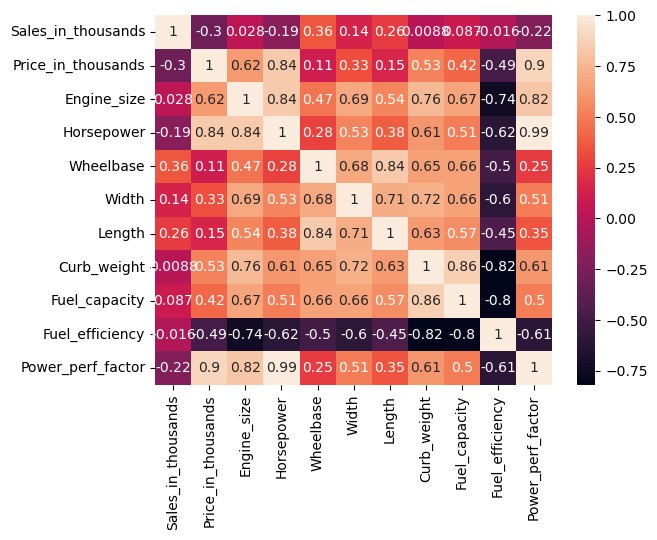

In [17]:
sns.heatmap(corr_mat,annot=True)

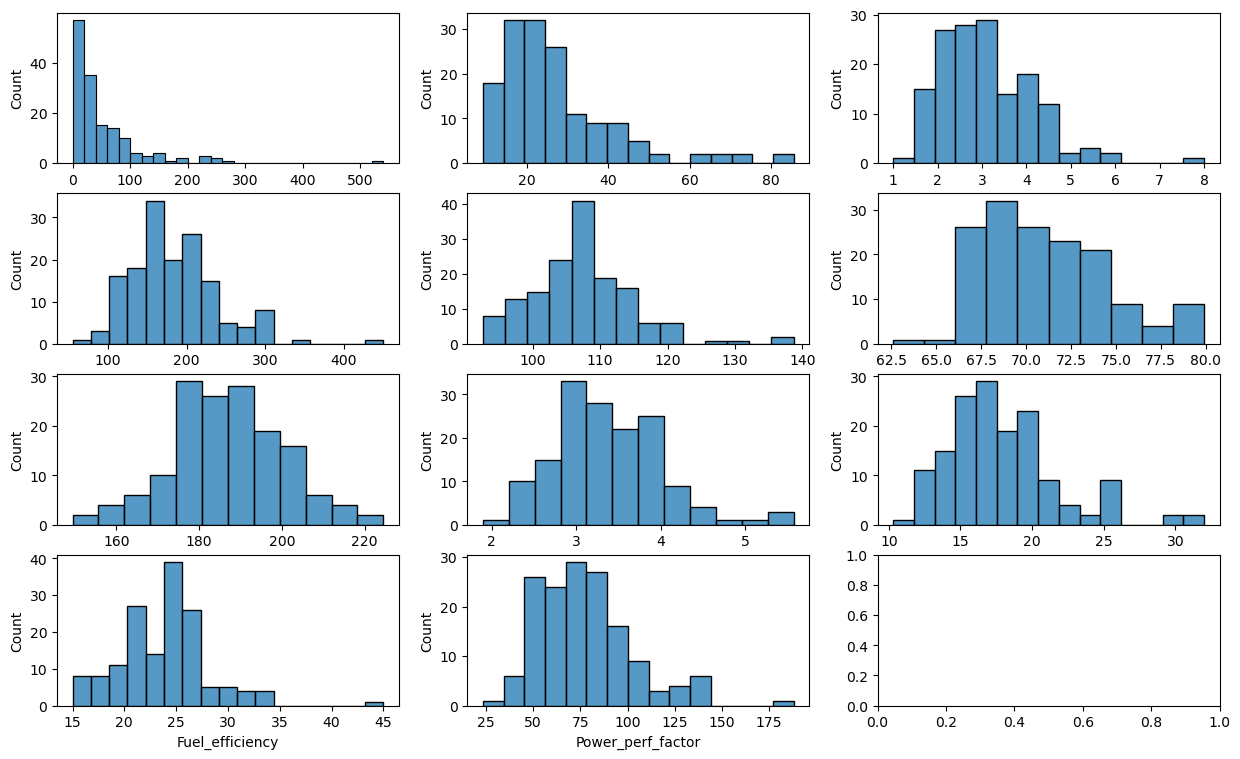

In [18]:
num_col = cardf.select_dtypes(["float64"])

fig,axs=plt.subplots(4,3,figsize=(15,9))
axs=axs.ravel()

count=0
for i in num_col:
    sns.histplot(x=i,data=cardf,ax=axs[count])
    count+=1  

In [19]:
# most show a normal distribution

# DBSCAN on two features

In [20]:
x=cardf.iloc[:,[8,9]].values

In [21]:
x

array([[ 67.3, 172.4],
       [ 70.3, 192.9],
       [ 71.4, 196.6],
       [ 68.2, 178. ],
       [ 76.1, 192. ],
       [ 74. , 198.2],
       [ 68.4, 176. ],
       [ 68.5, 176. ],
       [ 70.9, 188. ],
       [ 72.7, 194.6],
       [ 72.7, 196.2],
       [ 74.7, 206.8],
       [ 73.5, 200. ],
       [ 74.5, 207.2],
       [ 75.5, 200.6],
       [ 70.3, 194.8],
       [ 77. , 201.2],
       [ 67.9, 180.9],
       [ 69.4, 190.4],
       [ 72.5, 200.9],
       [ 72.7, 197.9],
       [ 74.1, 193.2],
       [ 73.6, 179.7],
       [ 66.7, 174.3],
       [ 62.6, 149.4],
       [ 73. , 200. ],
       [ 69.7, 190.9],
       [ 69.2, 193. ],
       [ 74.4, 209.1],
       [ 71. , 186. ],
       [ 74.4, 207.7],
       [ 74.4, 197.8],
       [ 74.4, 174.4],
       [ 69.1, 190.2],
       [ 71. , 186. ],
       [ 75.7, 176.7],
       [ 79.3, 224.2],
       [ 78.8, 192.6],
       [ 78.8, 208.5],
       [ 71.5, 215. ],
       [ 71.7, 193.5],
       [ 76.8, 186.3],
       [ 67. , 174.7],
       [ 73

In [22]:
x=pd.DataFrame(x)

In [23]:
x

,0,1
0,67.3,172.4
1,70.3,192.9
2,71.4,196.6
3,68.2,178.0
4,76.1,192.0
...,...,...
147,67.6,176.6
148,69.3,185.9
149,69.3,186.2
150,71.5,185.7


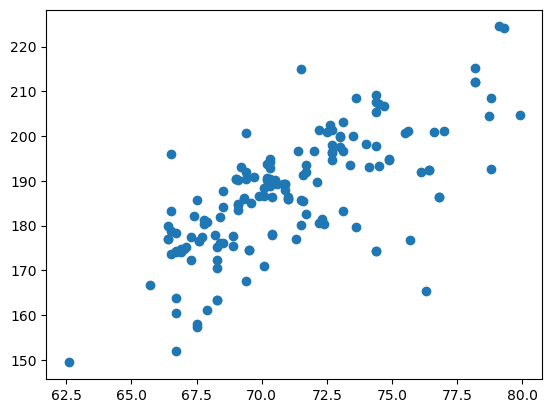

In [24]:
plt.scatter(x[0],x[1])

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
db=DBSCAN(eps=0.35,min_samples=11)
db.fit(x)
labels=db.labels_

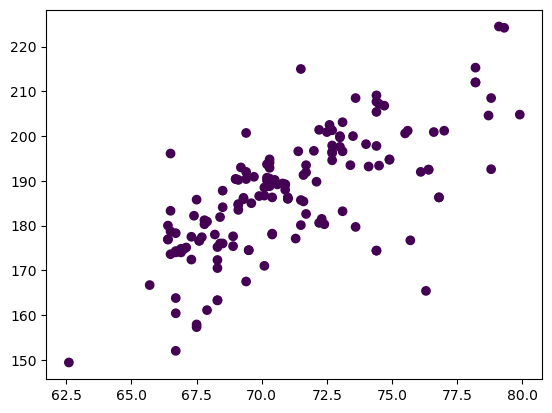

In [27]:
plt.scatter(x[0],x[1],c=labels)

In [28]:
# label encoding and feature scaling

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [29]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        152 non-null    object 
 1   Model               152 non-null    object 
 2   Sales_in_thousands  152 non-null    float64
 3   Vehicle_type        152 non-null    object 
 4   Price_in_thousands  152 non-null    float64
 5   Engine_size         152 non-null    float64
 6   Horsepower          152 non-null    float64
 7   Wheelbase           152 non-null    float64
 8   Width               152 non-null    float64
 9   Length              152 non-null    float64
 10  Curb_weight         152 non-null    float64
 11  Fuel_capacity       152 non-null    float64
 12  Fuel_efficiency     152 non-null    float64
 13  Latest_Launch       152 non-null    object 
 14  Power_perf_factor   152 non-null    float64
dtypes: float64(11), object(4)
memory usage: 19.0+ KB


In [30]:
cat_col = ['Model','Vehicle_type','Manufacturer','Latest_Launch']
cardf[cat_col] = cardf[cat_col].astype('category')

In [31]:
label_encoder =preprocessing.LabelEncoder()

for col in cat_col:
    cardf[col] = label_encoder.fit_transform(cardf[col])

In [32]:
scale_df=pd.DataFrame(StandardScaler().fit_transform(cardf),columns=cardf.columns)

In [33]:
scale_df

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,-1.731004,0.065039,-0.530336,0.597614,-0.405800,-1.193989,-0.791180,-0.807785,-1.097174,-1.091782,-1.161844,-1.212659,0.969070,-0.442318,-0.734082
1,-1.731004,1.467461,-0.203388,0.597614,0.074328,0.143983,0.709634,0.089203,-0.228427,0.435008,0.221934,-0.193449,0.269868,0.749072,0.584374
2,-1.731004,0.846717,-0.651583,0.597614,1.020668,0.430691,0.444785,0.934192,0.090113,0.710575,0.746760,0.010393,-0.429335,-0.306933,0.585131
3,-1.613648,-1.544298,-0.479719,0.597614,-0.232537,-1.193989,-0.614614,-0.625788,-0.836550,-0.674708,-0.596040,-0.397291,0.736002,-1.173398,-0.554885
4,-1.613648,-1.521307,-0.503252,0.597614,0.460518,-0.238295,0.268218,0.167202,1.451150,0.367978,0.291280,0.137795,-0.429335,1.425998,0.313210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,1.672326,1.559423,-0.724977,0.597614,-0.204007,-1.098420,-0.438047,-0.898784,-1.010299,-0.778977,-0.526693,-0.550172,0.269868,1.561384,-0.406619
148,1.672326,1.076622,-0.554699,0.597614,0.011702,-0.620573,-0.296794,-0.326792,-0.518009,-0.086335,-0.265068,-0.015087,0.269868,-1.010936,-0.241041
149,1.672326,1.582413,-0.521430,0.597614,0.102161,-0.620573,-0.296794,-0.326792,-0.518009,-0.063992,-0.184689,-0.015087,0.269868,0.640764,-0.221060
150,1.672326,-1.176449,-0.725734,0.597614,1.264211,-0.716142,0.903857,-0.326792,0.119072,-0.101231,0.354322,0.137795,-0.196267,0.207531,0.992876


In [34]:
# finding the Optimal values

In [35]:
from sklearn.neighbors import NearestNeighbors

In [36]:
neighbours=NearestNeighbors(n_neighbors=5)
neigh_fit = neighbours.fit(scale_df)
distance, index=neigh_fit.kneighbors(scale_df)

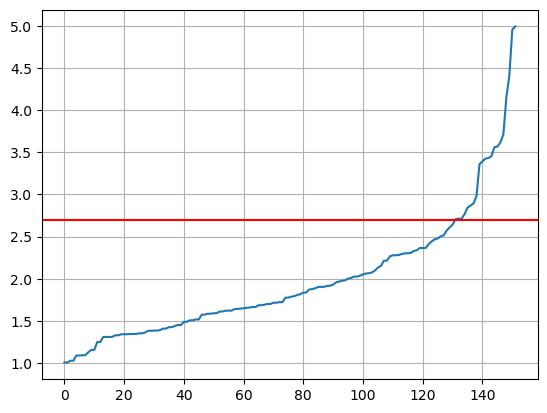

In [37]:
distance = np.sort(distance,axis=0)
distances=distance[:,1]
plt.plot(distances)
plt.axhline(y=2.7,color='r')
plt.grid()
#plt.yticks(np.arange(0,130,10))

In [38]:
# optimum value for the min_sample
eps=2.7
for i in range(10,30):
    db=DBSCAN(eps=eps,min_samples=i)
    db.fit(scale_df)
    labels=db.labels_
    
    new_labels=labels+2
    y=np.bincount(new_labels)
    z=np.nonzero(y)[0]
    cluster=list(zip(z,y[z]))
    print("min_samples:",i,"cluster:",cluster)

min_samples: 10 cluster: [(1, 36), (2, 99), (3, 17)]
min_samples: 11 cluster: [(1, 42), (2, 97), (3, 13)]
min_samples: 12 cluster: [(1, 42), (2, 97), (3, 13)]
min_samples: 13 cluster: [(1, 42), (2, 97), (3, 13)]
min_samples: 14 cluster: [(1, 55), (2, 97)]
min_samples: 15 cluster: [(1, 56), (2, 96)]
min_samples: 16 cluster: [(1, 57), (2, 95)]
min_samples: 17 cluster: [(1, 57), (2, 95)]
min_samples: 18 cluster: [(1, 59), (2, 93)]
min_samples: 19 cluster: [(1, 63), (2, 89)]
min_samples: 20 cluster: [(1, 70), (2, 82)]
min_samples: 21 cluster: [(1, 70), (2, 82)]
min_samples: 22 cluster: [(1, 71), (2, 81)]
min_samples: 23 cluster: [(1, 71), (2, 81)]
min_samples: 24 cluster: [(1, 71), (2, 81)]
min_samples: 25 cluster: [(1, 76), (2, 76)]
min_samples: 26 cluster: [(1, 81), (2, 71)]
min_samples: 27 cluster: [(1, 82), (2, 70)]
min_samples: 28 cluster: [(1, 84), (2, 40), (3, 28)]
min_samples: 29 cluster: [(1, 84), (2, 40), (3, 28)]


In [39]:
db=DBSCAN(eps=eps,min_samples=28)
db.fit(scale_df)
labels=db.labels_

In [40]:
labels

array([ 1,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0, -1,
       -1,  0,  0,  0,  0, -1, -1, -1,  0,  1,  0,  0,  1,  0,  0,  1,  0,
        1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  0,  0, -1, -1, -1,  0,  0,
       -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  0,  0, -1, -1,  1,  1, -1,
       -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1,  1,  0,  0, -1, -1,
       -1, -1,  0,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  0,  0,  0, -1,
       -1, -1, -1, -1,  0, -1,  1,  1,  1,  1,  0, -1, -1, -1,  0,  1, -1,
       -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  0, -1],
      dtype=int64)

In [41]:
cardf1['cluster']=labels

In [42]:
cardf1

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,cluster
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,0
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,0
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,-1
5,Audi,A6,18.780,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,-1
153,Volvo,S70,15.245,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,1
154,Volvo,V70,17.531,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,-1
155,Volvo,C70,3.493,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,0


In [43]:
cardf1['cluster'].value_counts()

-1    84
 0    40
 1    28
Name: cluster, dtype: int64

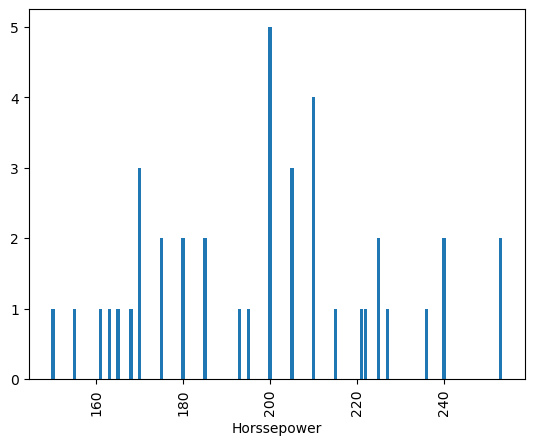

In [56]:
clust0 = cardf1[cardf1['cluster']==0]
plt.bar(clust0['Horsepower'].value_counts().index,clust0['Horsepower'].value_counts())
plt.xticks(rotation=90)
plt.xlabel('Horssepower')
plt.show()

In [45]:
# These manufacturer belong to the cluster 0.

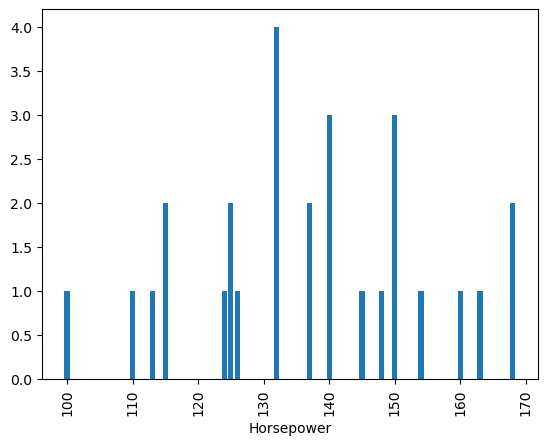

In [57]:
clust1 = cardf1[cardf1['cluster']==1]
plt.bar(clust1['Horsepower'].value_counts().index,clust1['Horsepower'].value_counts())
plt.xticks(rotation=90)
plt.xlabel('Horsepower')
plt.show()

In [47]:
# the above graph shows the Manufacturers which belong to the cluster 1

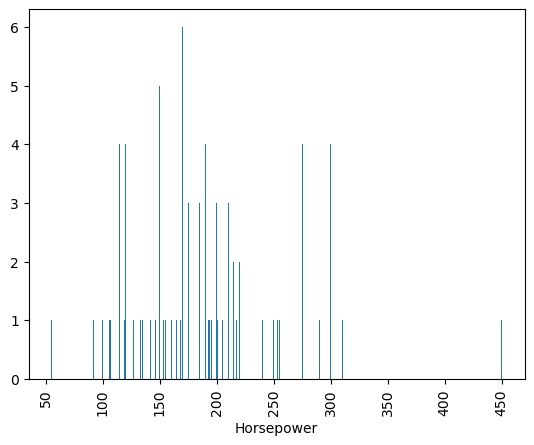

In [58]:
clust_1 = cardf1[cardf1['cluster']==-1]
plt.bar(clust_1['Horsepower'].value_counts().index,clust_1['Horsepower'].value_counts())
plt.xticks(rotation=90)
plt.xlabel('Horsepower')
plt.show()

In [49]:
# the above graph shows all the Horsepower.


When a new car is added to the dataset with the Horsepower between 200 and 240 , then it will belong to first cluster.  
when the horsepwer is between 100 and 170 , then it will belong to the second cluster.  
and when the horsepower is greater than 250 then it will bolong to the third cluster.